##### This project uses basic natural language processing techniques and sentiment analysis to explore the sentiment of tweets related to the conflict in Mali, Analyze the structure of the follower network of Twitter users in Mali and Explore how the structure of the network relates to the sentiments expressed in tweets relating to the conflict, identifying the extent of polarization in the network


In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

In [2]:

tweets = pd.read_csv('tweets_english.csv')

##### 1.1 How many tweets are there?


In [3]:
print(f'Total number of tweets: {len(tweets)}')

Total number of tweets: 1726643


In [4]:
tweets

,createdAtDateTweet,language,userId,tweetText
0,09/08/2021,en,3302898886,@Brindiii_ 100% naturelle
1,03/02/2020,en,3302898886,@queeenbnk Beautiful
2,15/08/2021,en,3302898886,@Brahimmock Twitter
3,02/09/2021,en,3302898886,@laDidette Princesse
4,10/08/2018,en,971023376281145344,@missloo223 Thx Dear Daughter ML
...,...,...,...,...
1726638,08/05/2022,en,1046017415816118273,Soninke bambara https://t.co/trEtUlEOwB
1726639,01/06/2022,en,1046017415816118273,RT @remarks: BREAKING: Johnny Depp wins defama...
1726640,05/06/2022,en,1046017415816118273,RT @Yves_Bissouma: Congratulations to all the ...
1726641,26/05/2022,en,1046017415816118273,RT @FranceRMCF: 📍Paname. https://t.co/GRVkMwmtFv


##### What share of the tweets are originals, and what share are retweets? Retweets can be identified based on tweets that start with “RT”; originals are all other tweets (including replies).

In [5]:
#how many retweets(RT) are there? they start with RT
tweets['retweet'] = tweets['tweetText'].str.startswith('RT')
print(f'There are {tweets['retweet'].sum()} retweets making up {np.round(tweets['retweet'].sum()/len(tweets)*100)}% of the data and \
        {len(tweets)-tweets['retweet'].sum()} original tweets making up {np.round((len(tweets)-tweets['retweet'].sum())/len(tweets)*100)}% of the data')

There are 924061 retweets making up 54.0% of the data and         802582 original tweets making up 46.0% of the data


##### How many unique twitter users post at least one tweet?

In [6]:
#unique users
print(f'number of unique users: {len(tweets['userId'].unique())}')

number of unique users: 25068


 #####  How many tweets does the average individual post? The median individual?

In [7]:
#tweets for average user
print(f'Number of tweets for average user: {len(tweets)/len(tweets['userId'].unique())}')
#tweets for median user
print(f'number of post of median user: {tweets['userId'].value_counts().median()}')

Number of tweets for average user: 68.87837083133876
number of post of median user: 3.0


#####  Which user posted the most tweets, and how many did they post?

In [8]:
#user with most tweets
print(f'User with most tweets: {tweets['userId'].value_counts().idxmax()}')
#how many tweets
print(f'Number of tweets for user with most tweets: {tweets['userId'].value_counts().max()}')

User with most tweets: 3136802532
Number of tweets for user with most tweets: 3246


##### Creating a table showing the number of tweets that contain the word ‘mali', and also contain each of the following keywords related to the conflict in Mali: (1) conflict, (2) army, (3) military, (4) minusma, (5) wagner, or (6) jnim? 

In [9]:
#empty dataframe
keywords = pd.DataFrame()

In [10]:
#convert all tweets to lowercase
tweets['tweetText'] = tweets['tweetText'].str.lower()
#column with tweets that contain the word 'mali' and 'conflict'
keywords['mali_conflict'] = (tweets['tweetText'].str.contains('mali') & tweets['tweetText'].str.contains('conflict')).astype(int)
#column with tweets that contain the word 'mali' and 'army'
keywords['mali_army'] = (tweets['tweetText'].str.contains('mali') & tweets['tweetText'].str.contains('army')).astype(int)
#column with tweets that contain the word 'mali' and 'military'
keywords['mali_military'] = (tweets['tweetText'].str.contains('mali') & tweets['tweetText'].str.contains('military')).astype(int)
#column with tweets that contain the word 'mali' and 'minusma'
keywords['mali_minusma'] = (tweets['tweetText'].str.contains('mali') & tweets['tweetText'].str.contains('minusma')).astype(int)
#column with tweets that contain the word 'mali' and 'wagner'
keywords['mali_wagner'] = (tweets['tweetText'].str.contains('mali') & tweets['tweetText'].str.contains('wagner')).astype(int)
#column with tweets that contain the word 'mali' and 'jnim'
keywords['mali_jnim'] = (tweets['tweetText'].str.contains('mali') & tweets['tweetText'].str.contains('jnim')).astype(int)
keywords

,mali_conflict,mali_army,mali_military,mali_minusma,mali_wagner,mali_jnim
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
1726638,0,0,0,0,0,0
1726639,0,0,0,0,0,0
1726640,0,0,0,0,0,0
1726641,0,0,0,0,0,0


In [11]:
#table for sum of each column in keywords
table = pd.DataFrame(keywords.sum())
table.columns = ['Number of tweets']
print(tabulate(table, headers = 'keys', tablefmt = 'fancy_grid'))

╒═══════════════╤════════════════════╕
│               │   Number of tweets │
╞═══════════════╪════════════════════╡
│ mali_conflict │               1408 │
├───────────────┼────────────────────┤
│ mali_army     │               1356 │
├───────────────┼────────────────────┤
│ mali_military │               2165 │
├───────────────┼────────────────────┤
│ mali_minusma  │               3087 │
├───────────────┼────────────────────┤
│ mali_wagner   │                541 │
├───────────────┼────────────────────┤
│ mali_jnim     │               1569 │
╘═══════════════╧════════════════════╛


##### Filter down to just the set of tweets that use at least one of the six key words identified 

In [12]:
#filter tweets to only those that contain keywords 
filtered_tweets = tweets[keywords.sum(axis=1) > 0]
filtered_tweets

,createdAtDateTweet,language,userId,tweetText,retweet
531,19/10/2017,en,415148657,rt @un_minusma: #unsc mission headed by 🇮🇹🇫🇷🇪🇹...,True
555,11/10/2018,en,415148657,rt @linkeviciusl: glad to meet my new colleagu...,True
571,07/01/2018,en,415148657,rt @un_minusma: quarterly report of the sg @un...,True
626,28/09/2017,en,415148657,rt @mbarangaun: i’m attending the meeting on p...,True
840,05/11/2012,en,299286557,rt @tweetsintheme: shock of all shocks nigeri...,True
...,...,...,...,...,...
1717769,19/08/2020,en,956850913,rt @ajplus: the african union suspended mali a...,True
1721883,28/07/2021,en,1510307870,calling all #mali watchers. interesting job up...,False
1725795,02/09/2014,en,544224048,rt @un_minusma: rt @unpeacekeeping: #mali: 4 p...,True
1726323,19/06/2020,en,1704509659,rt @madanboukman: wow. another massive protest...,True


#####   Analyze the sentiment of each of the tweets in the dataset of relevant tweets. Plot a histogram with the distribution of sentiment scores. 

In [13]:
sia = SentimentIntensityAnalyzer()
filtered_tweets['sentiment'] = filtered_tweets['tweetText'].apply(lambda x: sia.polarity_scores(x)['compound'])
filtered_tweets['sentiment_label'] = np.where(filtered_tweets['sentiment'] >= 0, 'positive', 'negative')
filtered_tweets

,createdAtDateTweet,language,userId,tweetText,retweet,sentiment,sentiment_label
531,19/10/2017,en,415148657,rt @un_minusma: #unsc mission headed by 🇮🇹🇫🇷🇪🇹...,True,0.8555,positive
555,11/10/2018,en,415148657,rt @linkeviciusl: glad to meet my new colleagu...,True,0.6808,positive
571,07/01/2018,en,415148657,rt @un_minusma: quarterly report of the sg @un...,True,0.7184,positive
626,28/09/2017,en,415148657,rt @mbarangaun: i’m attending the meeting on p...,True,0.7096,positive
840,05/11/2012,en,299286557,rt @tweetsintheme: shock of all shocks nigeri...,True,-0.7506,negative
...,...,...,...,...,...,...,...
1717769,19/08/2020,en,956850913,rt @ajplus: the african union suspended mali a...,True,0.0000,positive
1721883,28/07/2021,en,1510307870,calling all #mali watchers. interesting job up...,False,0.4019,positive
1725795,02/09/2014,en,544224048,rt @un_minusma: rt @unpeacekeeping: #mali: 4 p...,True,-0.4404,negative
1726323,19/06/2020,en,1704509659,rt @madanboukman: wow. another massive protest...,True,0.3182,positive


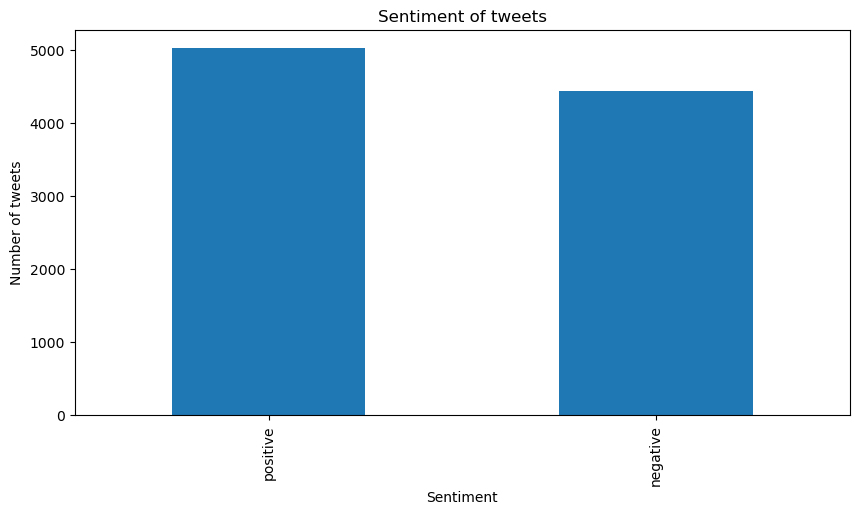

In [14]:
#bar plot for positive and negative tweets
plt.figure(figsize=(10,5))
filtered_tweets['sentiment_label'].value_counts().plot(kind='bar')
plt.title('Sentiment of tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

##### Is the average sentiment in the dataset positive or negative?

In [15]:
#sentiment of average tweet
print(f'Average sentiment: {filtered_tweets["sentiment"].mean()}')

Average sentiment: -0.09948150851581508


##### Analysing the five tweets with the most positive sentiment, and the five tweets with the most negative sentiment. 

In [16]:
top5 = filtered_tweets.sort_values(by='sentiment', ascending=False).head(5)
#print top 5 positive tweets
print(tabulate(top5[['tweetText', 'sentiment']], headers = 'keys', tablefmt = 'fancy_grid'))

╒═════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════╕
│         │ tweetText                                                                                                                                                                                                                                                                                                       │   sentiment │
╞═════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═════════════╡
│  2

In [17]:
last5 = filtered_tweets.sort_values(by='sentiment', ascending=True).head(5)
#print top 5 negative tweets
print(tabulate(last5[['tweetText', 'sentiment']], headers = 'keys', tablefmt = 'fancy_grid'))

╒═════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════╕
│         │ tweetText                                                                                                                                                                                                                                                                                │   sentiment │
╞═════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═════════════╡
│ 1286633 │ hundreds of civilians dead in menaka and gao  victims of isgs

In [18]:
network = pd.read_csv('network.csv')
network

,Unnamed: 0,source,target
0,0,1113480280319328256,814952637762338816
1,1,1113480280319328256,1425462559
2,2,1113480280319328256,2576396313
3,3,1113480280319328256,2380312390
4,4,1113480280319328256,1002158360588967937
...,...,...,...
1691602,1691602,2761949177,32861321
1691603,1691603,797615754480861188,557295896
1691604,1691604,797615754480861188,1372420525
1691605,1691605,797615754480861188,389486048


In [19]:
#convert csv to networkx graph
G = nx.from_pandas_edgelist(network, 'source', 'target', create_using=nx.DiGraph())
G

#####  How many unique individuals are in the dataset? In other words, how many nodes are in the graph?

In [20]:
#how many nodes
print(f'There are {len(G.nodes())} nodes') 

There are 56421 nodes


##### How many follower connections are there? In other words, how many edges are in the graph?


In [21]:
#how many edges
print(f'There are {len(G.edges())} edges') 

There are 1691607 edges


##### What is the mean number of people a user follows? In other words, what is the mean out-degree of a node in your graph?

In [22]:
#mean out-degree
print(f'The mean out-degree is {np.mean(list(dict(G.out_degree()).values()))}')

The mean out-degree is 29.981868453235496


#####  What is the mean number of followers a user has? In other words, what is the mean in-degree of a node in your graph?


In [23]:
#mean in-degree
print(f'The mean in-degree is {np.mean(list(dict(G.in_degree()).values()))}')

The mean in-degree is 29.981868453235496


#####  What is the median out-degree?

In [24]:
#median out-degree
print(f'The median out-degree is {np.median(list(dict(G.out_degree()).values()))}')

The median out-degree is 10.0


##### What is the median in-degre?

In [25]:
#median in-degree
print(f'The median in-degree is {np.median(list(dict(G.in_degree()).values()))}')

The median in-degree is 0.0


#####  Plot the distributions of in-degrees and out-degrees as two histograms. 

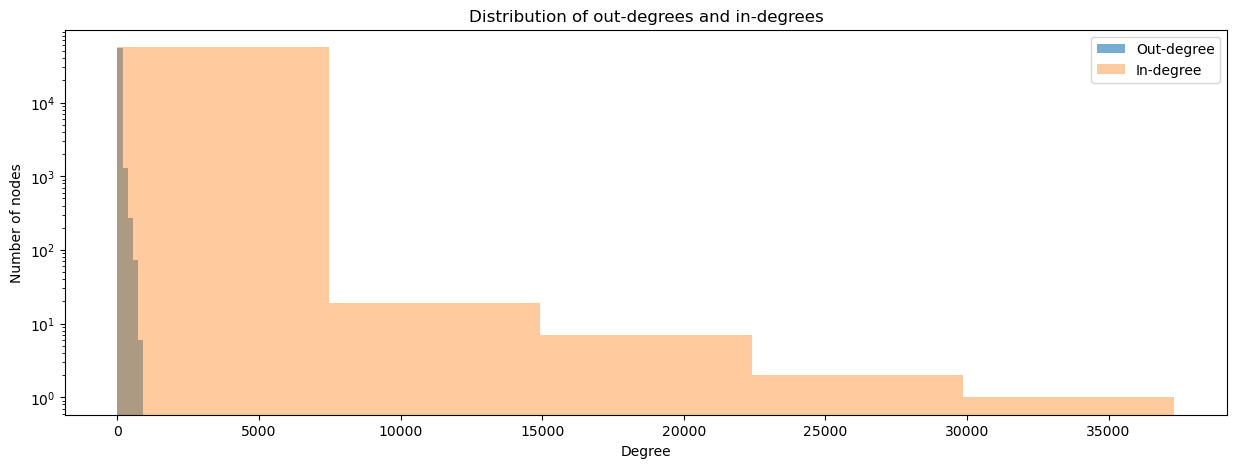

In [26]:
#distribution of out-degrees and in-degrees
plt.figure(figsize=(15,5))
plt.hist(list(dict(G.out_degree()).values()), bins=5, alpha=0.6, label='Out-degree')
plt.hist(list(dict(G.in_degree()).values()), bins=5, alpha=0.4, label='In-degree')
plt.title('Distribution of out-degrees and in-degrees')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.yscale('log')
plt.legend()
plt.show()

###### The in-degree distribution shows that while most users have very few followers, a small number of accounts have extraordinarily high follower counts reaching up to 35,000+. The out-degree distribution is highly concentrated near zero, with nearly all users following fewer than 500 accounts. This suggests most users are primarily content consumers rather than active networkers.

In [27]:
#merge tweets and network dataframes
merged = pd.merge(filtered_tweets, network, left_on='userId', right_on='source')
merged

,createdAtDateTweet,language,userId,tweetText,retweet,sentiment,sentiment_label,Unnamed: 0,source,target
0,19/10/2017,en,415148657,rt @un_minusma: #unsc mission headed by 🇮🇹🇫🇷🇪🇹...,True,0.8555,positive,562038,415148657,1215643230341079043
1,19/10/2017,en,415148657,rt @un_minusma: #unsc mission headed by 🇮🇹🇫🇷🇪🇹...,True,0.8555,positive,562039,415148657,1162652207852003328
2,19/10/2017,en,415148657,rt @un_minusma: #unsc mission headed by 🇮🇹🇫🇷🇪🇹...,True,0.8555,positive,562040,415148657,1002704703849975810
3,19/10/2017,en,415148657,rt @un_minusma: #unsc mission headed by 🇮🇹🇫🇷🇪🇹...,True,0.8555,positive,562041,415148657,3302898886
4,19/10/2017,en,415148657,rt @un_minusma: #unsc mission headed by 🇮🇹🇫🇷🇪🇹...,True,0.8555,positive,562042,415148657,2267960924
...,...,...,...,...,...,...,...,...,...,...
1353446,30/03/2018,en,979497170733813761,@un_minusma @karimkeita1 @un_orolsi @unpeaceke...,False,0.0000,positive,791651,979497170733813761,1011871952
1353447,30/03/2018,en,979497170733813761,@un_minusma @karimkeita1 @un_orolsi @unpeaceke...,False,0.0000,positive,791652,979497170733813761,423106239
1353448,30/03/2018,en,979497170733813761,@un_minusma @karimkeita1 @un_orolsi @unpeaceke...,False,0.0000,positive,791653,979497170733813761,109634657
1353449,30/03/2018,en,979497170733813761,@un_minusma @karimkeita1 @un_orolsi @unpeaceke...,False,0.0000,positive,791654,979497170733813761,3349673331


##### Identifying the set of users in the network dataset that also make at least 10 tweets in the keyword-filtered dataset used earlier. How many users are there?


In [28]:
# users that make more than 10 posts
users = merged['userId'].value_counts()
users = users[users > 10].index
print(f'There are {len(users)} users that make more than 10 posts')

There are 1109 users that make more than 10 posts


##### subgraph of just this set of users, and filter out any users with no followers within the subgraph . How many users remain in the subgraph?

In [29]:
#create subgraph with users that make more than 10 posts
subgraph = G.subgraph(users)    
#filter out users with no edges
subgraph = subgraph.subgraph([node for node in subgraph.nodes() if subgraph.degree(node) > 0])
#length of subgraph
print(f'The subgraph has {len(subgraph.nodes())} nodes and {len(subgraph.edges())} edges')

The subgraph has 1107 nodes and 51050 edges


##### Calculate the average sentiment score of the tweets for each of the users in the subgraph from question  H

In [30]:
#filter merged dataframe to only include users in subgraph
merged = merged[merged['userId'].isin(subgraph.nodes())]
merged

,createdAtDateTweet,language,userId,tweetText,retweet,sentiment,sentiment_label,Unnamed: 0,source,target
0,19/10/2017,en,415148657,rt @un_minusma: #unsc mission headed by 🇮🇹🇫🇷🇪🇹...,True,0.8555,positive,562038,415148657,1215643230341079043
1,19/10/2017,en,415148657,rt @un_minusma: #unsc mission headed by 🇮🇹🇫🇷🇪🇹...,True,0.8555,positive,562039,415148657,1162652207852003328
2,19/10/2017,en,415148657,rt @un_minusma: #unsc mission headed by 🇮🇹🇫🇷🇪🇹...,True,0.8555,positive,562040,415148657,1002704703849975810
3,19/10/2017,en,415148657,rt @un_minusma: #unsc mission headed by 🇮🇹🇫🇷🇪🇹...,True,0.8555,positive,562041,415148657,3302898886
4,19/10/2017,en,415148657,rt @un_minusma: #unsc mission headed by 🇮🇹🇫🇷🇪🇹...,True,0.8555,positive,562042,415148657,2267960924
...,...,...,...,...,...,...,...,...,...,...
1353446,30/03/2018,en,979497170733813761,@un_minusma @karimkeita1 @un_orolsi @unpeaceke...,False,0.0000,positive,791651,979497170733813761,1011871952
1353447,30/03/2018,en,979497170733813761,@un_minusma @karimkeita1 @un_orolsi @unpeaceke...,False,0.0000,positive,791652,979497170733813761,423106239
1353448,30/03/2018,en,979497170733813761,@un_minusma @karimkeita1 @un_orolsi @unpeaceke...,False,0.0000,positive,791653,979497170733813761,109634657
1353449,30/03/2018,en,979497170733813761,@un_minusma @karimkeita1 @un_orolsi @unpeaceke...,False,0.0000,positive,791654,979497170733813761,3349673331


In [31]:
#average sentiment of each user
average_sentiment = merged.groupby('userId')['sentiment'].mean()
average_sentiment = average_sentiment.sort_values(ascending=False)
average_sentiment

userId
1445321364202721280    0.930675
1191311091789389824    0.929900
279216232              0.926900
1373584710870433792    0.924600
950792366486679552     0.922800
                         ...   
1164846659492286465   -0.918600
861437502871261184    -0.919600
968516244361052161    -0.930900
802689067             -0.943200
2255258791            -0.961200
Name: sentiment, Length: 1107, dtype: float64

In [32]:
positive_users = average_sentiment[average_sentiment > 0]
print(f'There are {len(positive_users)} users with positive sentiment')
negative_users = average_sentiment[average_sentiment < 0]
print(f'There are {len(negative_users)} users with negative sentiment')

There are 373 users with positive sentiment
There are 606 users with negative sentiment


##### Visualize the subgraph network from earlier

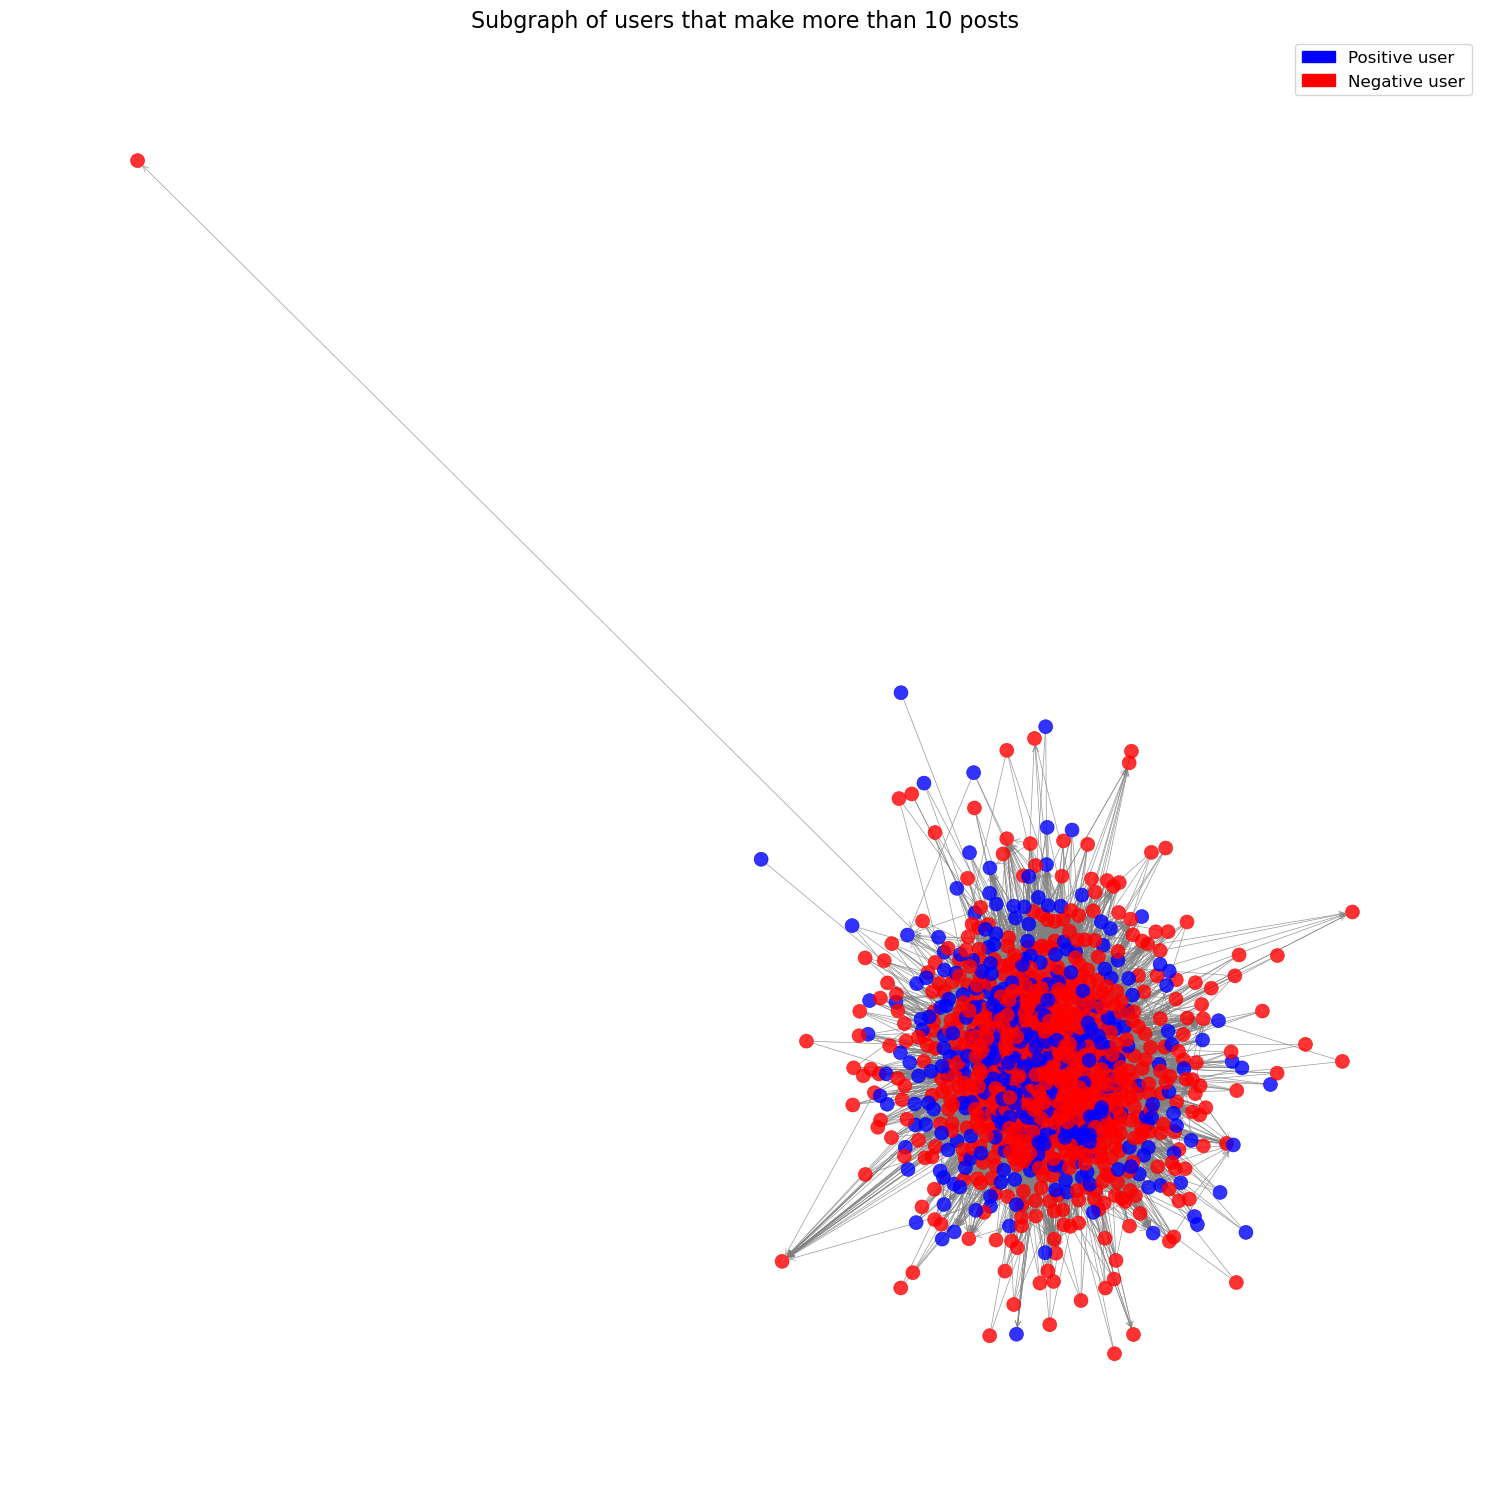

In [33]:
fig, ax = plt.subplots(figsize=(15, 15))
#force-directed layout
pos = nx.spring_layout(subgraph, k=0.15, iterations=100)

# color map based on sentiment 
color_map = []
for node in subgraph.nodes():
    if node in positive_users.index:
        color_map.append('blue')  # Positive sentiment
    else:
        color_map.append('red')   # Negative sentiment

#legend elements
positive_patch = mpatches.Patch(color='blue', label='Positive user')
negative_patch = mpatches.Patch(color='red', label='Negative user')

# Add the legend to plot
plt.legend(handles=[positive_patch, negative_patch], 
           loc='upper right', 
           fontsize=12)        

# network
nx.draw(
    subgraph, 
    pos, 
    ax=ax,
    with_labels=False,
    #node_size=[75 + 20*d for d in dict(subgraph.degree()).values()],
    node_size = 100,
    node_color=color_map,
    edge_color='gray',
    alpha=0.8,
    linewidths=0.5,
    width=0.5,
    arrows=True,
    arrowsize=10,
    arrowstyle='->'
)

# title
ax.set_title('Subgraph of users that make more than 10 posts', fontsize=16)
plt.tight_layout()
plt.show()

###### Looking at the network visualization, both positive (blue) and negative (red) sentiment users are extensively intermixed throughout the central cluster, suggesting significant cross sentiment connections rather than strict polarization. There are more red nodes (negative sentiment users) visible, aligning with the data showing 606 negative sentiment users compared to 373 positive sentiment users. This shows that while users might have some preference for connecting with others sharing similar sentiments, they maintain substantial connections across sentiment boundaries, confirming that polarization in this network is relatively mild

#####  For each positive-sentiment user in the subgraph, calculate the share of other positive users they follow. Then calculate the share of the negative users they follow. On average, what is the probability that a positive user will follow another positive user (that is, what is the average share of all other positive users that a positive user follows)? On average, what is the probability that a positive user will follow a negative user (that is, what is the average share of all negative users that a positive user follows)? Is the average positive-sentiment user more likely to follow another positive-sentiment user or a negative-sentiment user?

In [34]:
#Initialize counters for following
pos_follow_neg = []#positive users following negative users
pos_follow_pos = []#positive users following positive users
# For each positive user, calculate following number of negative and positive followers
for pos_user in positive_users.index:
    # Get users that the poitive user follows
    follows = list(subgraph.successors(pos_user))
    # Count how many negative users they follow
    neg_follows = sum(1 for user in follows if user in negative_users )
    # Count how many positive users they follow
    pos_follows = sum(1 for user in follows if user in positive_users and user != pos_user)
    # Add to lists
    pos_follow_neg.append(neg_follows)
    pos_follow_pos.append(pos_follows)
# Calculate averages
avg_pos_follow_neg = sum(pos_follow_neg) / len(negative_users) if pos_follow_neg else 0
avg_pos_follow_pos = sum(pos_follow_pos) / len(positive_users) if pos_follow_pos else 0
# results
print(f"On average, a positive user follows {np.round(avg_pos_follow_neg)\
                                             } of all negative users which is {np.round(avg_pos_follow_neg/len(negative_users)*100\
                                                                                        )}% of all negative users")
print(f"On average, a positive user follows {np.round(avg_pos_follow_pos)\
                                             } of all other positive users which is {np.round(avg_pos_follow_pos/len(positive_users)*100\
                                                                                              )}% of all positive users")
# which is more likely
if avg_pos_follow_neg/len(negative_users)*100 > avg_pos_follow_pos/len(positive_users)*100:
    print("Positive users are more likely to follow negative users")
elif avg_pos_follow_neg/len(negative_users)*100 < avg_pos_follow_pos/len(positive_users)*100:
    print("Positive users are more likely to follow other positive users")
else:
    print("Positive users are equally likely to follow negative or positive users")

On average, a positive user follows 15.0 of all negative users which is 3.0% of all negative users
On average, a positive user follows 16.0 of all other positive users which is 4.0% of all positive users
Positive users are more likely to follow other positive users


##### For each negative-sentiment user in the subgraph , calculate the share of other negative users they follow. Then calculate the share of the positive users they follow. On average, what is the probability that a negative user will follow another negative user (that is, what is the average share of all other negative users that a negative user follows)? On average, what is the probability that a negative user will follow a positive user (that is, what is the average share of all positive users that a negative user follows)? Is the average negative-sentiment user more likely to follow another negative-sentiment user or a positive-sentiment user?

In [35]:
#  Initialize counters for following
neg_follow_neg = []
neg_follow_pos = []

# For each negative user, calculate following following number of negative and positive followers
for neg_user in negative_users.index:
    # Get users that the negative user follows
    follows = list(subgraph.successors(neg_user))
    
    # Count how many negative users they follow
    neg_follows = sum(1 for user in follows if user in negative_users and user != neg_user)
    
    # Count how many positive users they follow
    pos_follows = sum(1 for user in follows if user in positive_users)
    
    # Add to our lists
    neg_follow_neg.append(neg_follows)
    neg_follow_pos.append(pos_follows)

# Calculate averages
avg_neg_follow_neg = sum(neg_follow_neg) / len(negative_users) if neg_follow_neg else 0
avg_neg_follow_pos = sum(neg_follow_pos) / len(positive_users) if neg_follow_pos else 0

#results
print(f"On average, a negative user follows {np.round(avg_neg_follow_neg)\
                                             } of all other negative users which is {np.round(avg_neg_follow_neg/len(negative_users)*100\
                                                                                              )}% of all negative users")
print(f"On average, a negative user follows {np.round(avg_neg_follow_pos)\
                                             } of all positive users which is {np.round(avg_neg_follow_pos/len(positive_users)*100\
                                                                                        )}% of all positive users")

# which is more likely
if avg_neg_follow_neg/len(negative_users)*100 > avg_neg_follow_pos/len(positive_users)*100:
    print("Negative users are more likely to follow other negative users")
elif avg_neg_follow_neg/len(negative_users)*100 < avg_neg_follow_pos/len(positive_users)*100:
    print("Negative users are more likely to follow positive users")
else:
    print("Negative users are equally likely to follow negative or positive users")

On average, a negative user follows 29.0 of all other negative users which is 5.0% of all negative users
On average, a negative user follows 24.0 of all positive users which is 7.0% of all positive users
Negative users are more likely to follow positive users


###### The data shows a complex picture of polarization on Twitter regarding the conflict. Polarization is not as extreme as might be expected. Both positive and negative sentiment users show homophily (tendency to connect with others of same sentiments), but also significant cross-sentiment connections. Positive users follow 4% of available positive users versus 3% of negative users, while negative users follow 7% of available positive users versus 5% of negative users. These relatively low percentages across all connections suggest that users aren't forming tight echo chambers. Instead, there’s a pattern where users maintain some preference for similar sentiment connections while also maintaining substantial cross sentiment visibility. This suggests that while some polarization exists, it's relatively mild and doesn't manifest as complete isolation between sentiment groups.
